In [275]:
import numpy as np
import random as rd
import cv2
import matplotlib.pyplot as plt

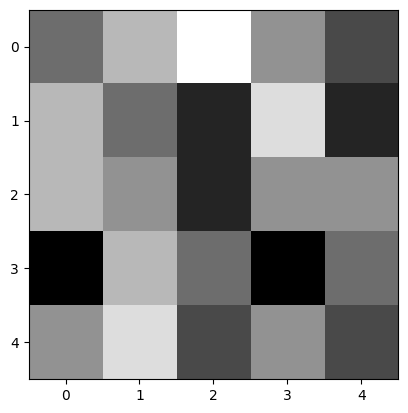

In [276]:
# khởi tạo matrix là matrix 5x5 với giá trị đều là 0
matrix = np.zeros((5, 5))
# khởi tạo 20 matrix_add với giá trị random từ 0 đến 1
matrix_add_list = []
for i in range(20):
    matrix_add = np.random.randint(0, 2, (5, 5))
    matrix_add_list.append(matrix_add)
# cộng 20 matrix_add lần lượt vào matrix
for i in range(20):
    matrix += matrix_add_list[i]
# đưa về chuẩn từ 0 đến 255
matrix = matrix * 255 / 20
# chuyển matrix thành kiểu int
matrix = matrix.astype(np.uint8)
# hiển thị matrix
plt.imshow(matrix, cmap='gray')
plt.show()


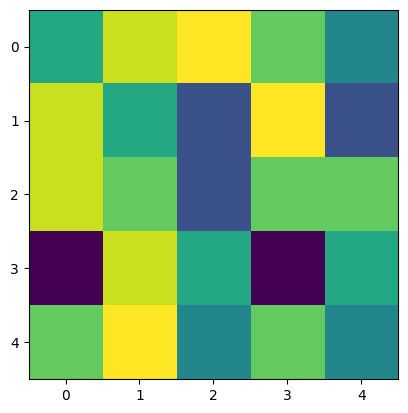

In [277]:
matrix_uint8 = matrix.astype(np.uint8)
matrix_colored = cv2.applyColorMap(matrix_uint8, cv2.COLORMAP_JET)
matrix_colored = cv2.cvtColor(matrix_colored, cv2.COLOR_BGR2GRAY)  # Ensure same number of channels
matrix = cv2.addWeighted(matrix_uint8, 1, matrix_colored, 0.5, 0)
# hiển thị ảnh
plt.imshow(matrix)
plt.show()

In [278]:
# test với ảnh thật kênh màu BGR
img = cv2.imread('image/room.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(500, 800, 3)

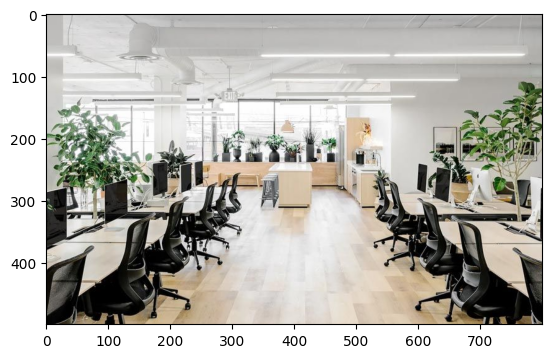

In [279]:
plt.imshow(img)
plt.show()

In [280]:
# khởi tạo 10 random matrix có các khối xyxy có độ lớn các cạnh 50x50
# for i in range(20):
#     x = rd.randint(0, img.shape[1] - 50)
#     y = rd.randint(0, img.shape[0] - 50)
#     img[y:y+50, x:x+50] = np.random.randint(0, 256, (50, 50, 3))
# plt.imshow(img)
# plt.show()

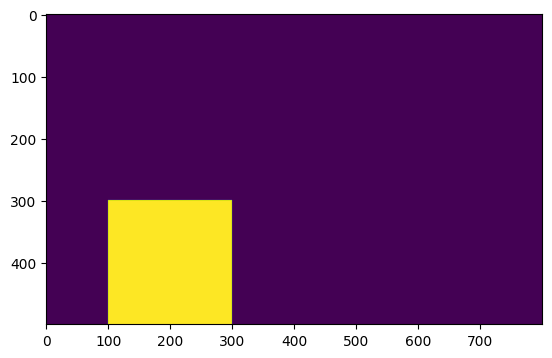

In [281]:
# khởi tạo ma trận mask không màu và có kích thước bằng ảnh gốc 500x800
mask = np.zeros_like(img)
# khởi tạo 1 matrix có kích thước bằng mask tuy nhiên có 1 vùng 50x50 có giá trị 1
mask_1 = np.zeros((500, 800))
mask_1[300:500, 100:300] = 1
plt.imshow(mask_1)
plt.show()

In [282]:
mask_2 = np.zeros((500, 800))
mask_2[250:400, 200:350] = 1
mask_3 = np.zeros((500, 800))
mask_3[200:350, 300:450] = 1
mask_4 = np.zeros((500, 800))
mask_4[150:300, 400:550] = 1
mask_5 = np.zeros((500, 800))
mask_5[200:400, 500:650] = 1
mask_6 = np.zeros((500, 800))
mask_6[250:450, 600:750] = 1

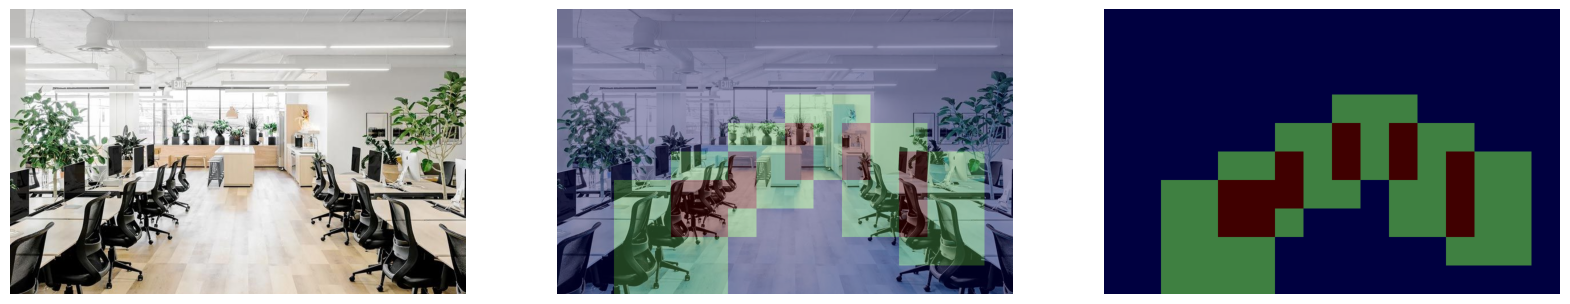

In [298]:
img = cv2.imread('image/room.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask_1 = np.zeros((500, 800))
mask_1[300:500, 100:300] = 1
mask_2 = np.zeros((500, 800))
mask_2[250:400, 200:350] = 1
mask_3 = np.zeros((500, 800))
mask_3[200:350, 300:450] = 1
mask_4 = np.zeros((500, 800))
mask_4[150:300, 400:550] = 1
mask_5 = np.zeros((500, 800))
mask_5[200:400, 500:650] = 1
mask_6 = np.zeros((500, 800))
mask_6[250:450, 600:750] = 1

img_mask = np.zeros_like(img)

accumulated_mask = mask_1 + mask_2 + mask_3 + mask_4 + mask_5 + mask_6

normalized_mask = np.clip(accumulated_mask / accumulated_mask.max(), 0, 1)

colored_mask = cv2.applyColorMap(np.uint8(255 * normalized_mask), cv2.COLORMAP_JET)

result_img = cv2.addWeighted(img_mask, 0.6, colored_mask, 0.5, 0)

# result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
# add mask to image
image_output = cv2.addWeighted(img, 0.6, result_img, 0.5, 0)

image_output = cv2.cvtColor(image_output, cv2.COLOR_BGR2RGB)
result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_output)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_img)
plt.axis('off')
plt.show()
